<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml18_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve, convolve2d, correlate, correlate2d
from sklearn.datasets import load_sample_image
from sklearn.model_selection import train_test_split

import keras

# 1차원 합성곱 연산(1-D Convolution)

In [5]:
x = np.arange(1,5)
print(x)

[1 2 3 4]


In [6]:
y = np.array([1, 2])
print(y)

[1 2]


In [7]:
y_flip = np.flip(y)
print(y_flip)

[2 1]


## convolve 함수

scipy.signal.convove 함수는 배열 y를 flip(반전)시킨 후 연산을 수행.

In [9]:
result = convolve(x, y, mode='valid')   # valid mode 합성곱 연산 -> 배열 x의 크기가 줄어듦.
print(result)

[ 4  7 10]


In [11]:
result = convolve(x, y, mode='same')   # same mode 합성곱 연산 -> 배열 x의 크기와 동일한 배열 리턴.
print(result)

[ 1  4  7 10]


In [13]:
result = convolve(x, y, mode='full')   # full mode 합성곱 연산
# -> 배열 x의 모든 원소가 합성곱 연산에  같은 비율로 참여하도록 패딩을 넣는 것.
print(result)

[ 1  4  7 10  8]


## 교차 상관(cross-correlate)

scipy.signal.correlate 함수는 배열y를 반전시키지 않고 연산을 수행.

In [14]:
result = correlate(x, y, mode='valid')
print(result)

[ 5  8 11]


In [15]:
result = correlate(x, y, mode='same')
print(result)

[ 2  5  8 11]


In [16]:
result = correlate(x, y, mode='full')
print(result)

[ 2  5  8 11  4]


# 2차원 합성곱(2-D Convolution)

In [17]:
x = np.arange(1, 17).reshape((4, 4))
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [19]:
y = np.array([[0, 1], [2, 0]])
print(y)

[[0 1]
 [2 0]]


In [22]:
y_flip = np.flip(y)
print(y_flip)

[[0 2]
 [1 0]]


## convolve2d 함수

In [23]:
result = convolve2d(x, y, mode='valid')
print(result)   #> (3, 3) shape

[[ 9 12 15]
 [21 24 27]
 [33 36 39]]


In [24]:
result = convolve2d(x, y, mode='same')
print(result)   #> (4, 4) shape

[[ 0  1  2  3]
 [ 2  9 12 15]
 [10 21 24 27]
 [18 33 36 39]]


In [26]:
result = convolve2d(x, y, mode='full')
print(result)

[[ 0  1  2  3  4]
 [ 2  9 12 15  8]
 [10 21 24 27 12]
 [18 33 36 39 16]
 [26 28 30 32  0]]


## correlate2d 함수

In [27]:
result = correlate2d(x, y, mode='valid')
print(result)

[[12 15 18]
 [24 27 30]
 [36 39 42]]


In [28]:
result = correlate2d(x, y, mode='same')
print(result)

[[12 15 18 16]
 [24 27 30 24]
 [36 39 42 32]
 [14 15 16  0]]


In [29]:
result = correlate2d(x, y, mode='full')
print(result)

[[ 0  2  4  6  8]
 [ 1 12 15 18 16]
 [ 5 24 27 30 24]
 [ 9 36 39 42 32]
 [13 14 15 16  0]]


# 이미지 배열과 합성곱

In [30]:
china = load_sample_image('china.jpg')

In [31]:
china.shape

(427, 640, 3)

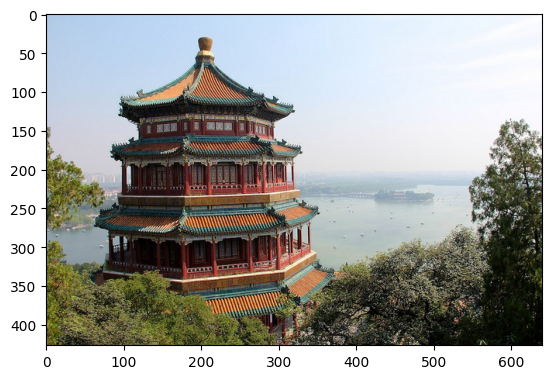

In [32]:
plt.imshow(china)
plt.show()

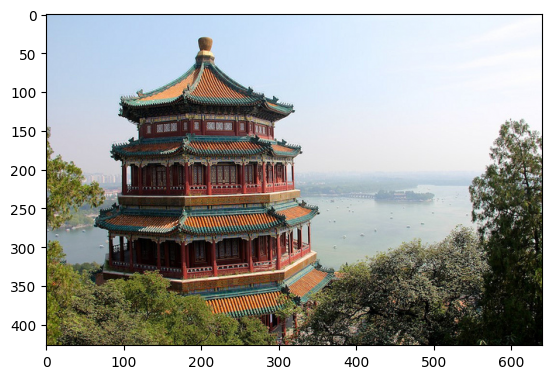

In [34]:
china_cp = china.copy() / 255.0     # 0 ~ 255 범위를 0 ~ 1 범위로 스케일링
plt.imshow(china_cp)
plt.show()

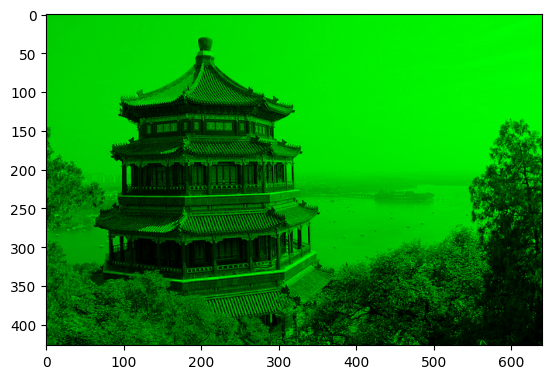

In [35]:
china_cp[:, :, [0, 2]] = 0
plt.imshow(china_cp)
plt.show()

In [39]:
filter = np.zeros(shape=(3, 3, 3))
filter[:, :, 0] = 1
result = convolve(china, filter, mode='same')
result = result.astype(np.uint8) # np.uint8 : unsigined int 8bit. 8 bit 부호 없는 정수. 0 ~ 255.
print(result.shape)

(427, 640, 3)


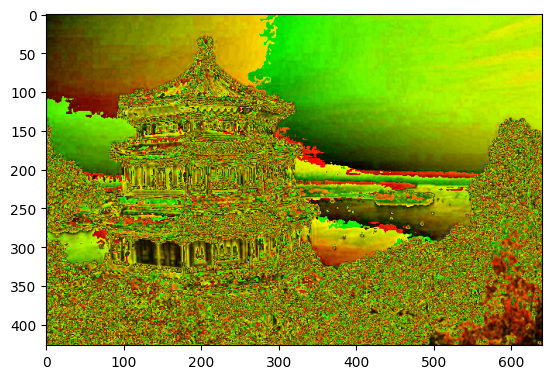

In [40]:
plt.imshow(result)
plt.show()

# Pooling

In [41]:
x = np.arange(1, 21).reshape((5, 4))
print(x)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]


In [42]:
x = x.reshape((1,5,4, 1))

## Max Pooling(최대 풀링)

필터링된 값들 중에서 최댓값을 선택하는 풀링 방식.

In [45]:
max_pooling = keras.layers.MaxPool2D()
x_pool = max_pooling(x)
print(x_pool.shape)
print(type(x_pool))

(1, 2, 2, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [46]:
print(x_pool.numpy().reshape((2, 2)))   # Tensor -> numpy 배열 변환 -> reshape

[[ 6  8]
 [14 16]]


## Average Pooling(평균 풀링)

필터링된 값들의 평균을 선택하는 풀링 방식.

In [47]:
x = x.astype(np.float32)    # TensorFlow는 암묵적인 타입 변환을 수행하지 않기 때문에.
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2,2))
x_pool = avg_pooling(x)
print(type(x_pool))
print(x_pool.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
(1, 2, 2, 1)


In [48]:
(1 + 2 + 5 + 6) / 4

3.5

일반적으로 합성곱 연산에서는 필터를 1칸씩 이동(보폭 stride의 크기를 1로 설정). 풀링에서는 필터를 필터 크기만큼씩 이동.

## 이미지의 풀링(pooling)

이미지 축소

In [49]:
flower = load_sample_image('flower.jpg').copy()

In [51]:
flower.shape    # (height, width, channel)

(427, 640, 3)

In [52]:
flower = flower / 255.0 # 0 ~ 1 범위로 스케일링

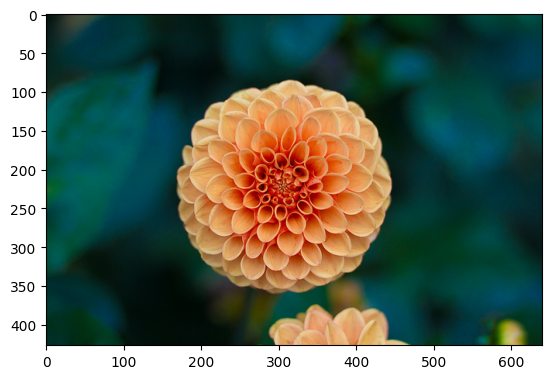

In [53]:
plt.imshow(flower)
plt.show()

In [54]:
max_pooling = keras.layers.MaxPool2D()

In [56]:
x = flower.reshape((1, 427, 640, 3))
x_pool = max_pooling(x)
print(x_pool.shape)
print(type(x_pool))

(1, 213, 320, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


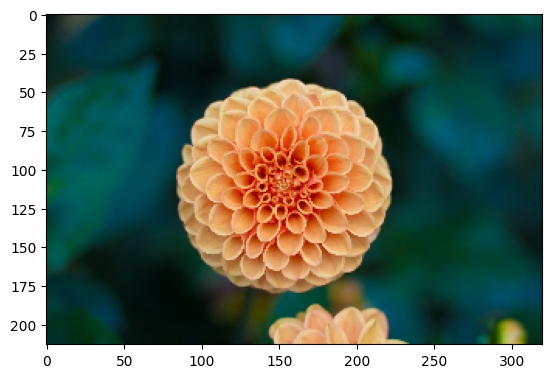

In [57]:
img = x_pool[0].numpy()
plt.imshow(img)
plt.show()

In [58]:
avg_pooling = keras.layers.AveragePooling2D(pool_size=(2, 2))

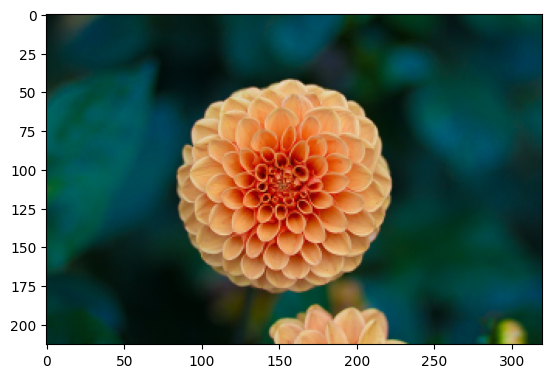

In [60]:
x_pool = avg_pooling(x)
img = x_pool[0].numpy()
plt.imshow(img)
plt.show()